# We construct a HMM to learn the velocity settings as hidden states

We also use the improbable transition counter for thresholding

In [1]:
import numpy as np
import pickle 
trajectory_file = open("trajectories.pyo", "rb")
trajs = pickle.load(trajectory_file)
y_vec = np.array(trajs['y_vec'])
t_vec = np.array(trajs['t_vec'])
v_vec = np.array(trajs['v_vec'])
a_vec = np.array(trajs['a_vec'])
# remove the mean component from y_vec 
y_mean = np.array(trajs['y_mean'])
del trajs
trajectory_file.close()
del trajectory_file

/var/folders/cz/fwskdlzd1y90jrpkhcwcbctw0000gn/T/ipykernel_4137/3670597040.py:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  v_vec = np.array(trajs['v_vec'])
/var/folders/cz/fwskdlzd1y90jrpkhcwcbctw0000gn/T/ipykernel_4137/3670597040.py:8: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  a_vec = np.array(trajs['a_vec'])


In [12]:
for i,a in enumerate(a_vec):
    a_vec[i] = np.array(a[0:80])
a_vec = np.stack(a_vec, axis=0)

Plotting some velocity graph, we shall construct a HMM to learn this shit

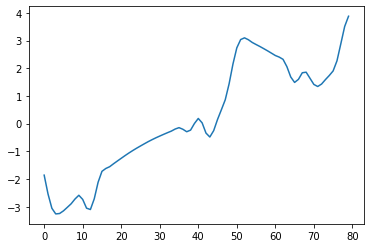

In [17]:
from matplotlib import pyplot as plt
plt.plot(np.arange(80),a_vec[6,:])

Create training data for the HMM from hmmlearn

In [19]:
training_data = a_vec.copy()
training_length = [a_vec[i].shape[0] for i in range(a_vec.shape[0])]
training_data = training_data.flatten().reshape((-1,1))

In [24]:
# start training the HMM model 
from hmmlearn import hmm 
np.random.seed(42)

model = hmm.GaussianHMM(n_components=5, covariance_type="full", n_iter=1000)
# model.startprob_ = np.array([0.2, 0.2, 0.2])
# model.transmat_ = np.array([[0.7, 0.2, 0.1],
#                             [0.3, 0.5, 0.2],
#                             [0.3, 0.3, 0.4]])
# model.means_ = np.array([[0.0, 0.0], [3.0, -3.0], [5.0, 10.0]]) # emission model
# model.covars_ = np.tile(np.identity(2), (3, 1, 1)) # emission model
model.fit(training_data, training_length)
model.monitor_

ConvergenceMonitor(
    history=[-37743.55554821421, -31250.552327104055, -27959.547111252945, -24624.799159057773, -21777.97197712126, -19744.870601575756, -18434.082609565416, -17702.119399899308, -17572.7275182823, -17532.82782494388, -17507.724231824366, -17490.456966016194, -17478.108330148843, -17469.058427389, -17462.33443912352, -17457.28625067083, -17453.460473409003, -17450.551487141336, -17448.347343688965, -17446.681330388306, -17445.4203575562, -17444.463929535134, -17443.737649395815, -17443.185893860442, -17442.766556647686, -17442.447577182895, -17442.204527216763, -17442.018820698453, -17441.876343333828, -17441.766398577918, -17441.680901181633, -17441.61376272098, -17441.56042269032, -17441.517487731828, -17441.482450626114, -17441.453469174994, -17441.429192169973, -17441.40862441135, -17441.391024983717, -17441.37583335985, -17441.362617594124, -17441.351038886256, -17441.340827497104, -17441.331766157837],
    iter=44,
    n_iter=1000,
    tol=0.01,
    verbose=Fa

Total iterations  44
Convergence?  True


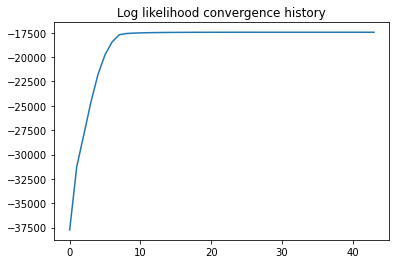

In [25]:
plt.plot(np.array(list(model.monitor_.history)))
plt.title('Log likelihood convergence history')
print('Total iterations ', model.monitor_.iter)
print('Convergence? ', model.monitor_.converged)

Testing a sample accleration profile

The score is -139.58


Text(0.5, 1.0, 'Hidden state sequence')

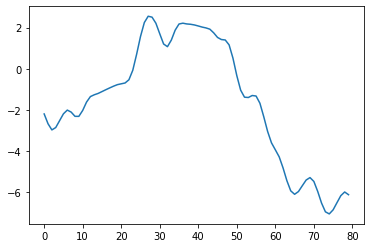

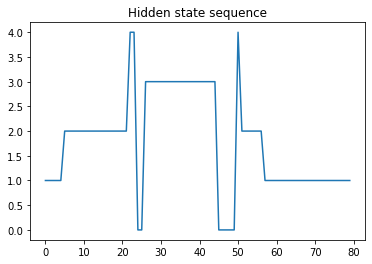

In [26]:
sample_accel_profile = a_vec[12,:].copy()
plt.figure()
plt.plot(sample_accel_profile)
plt.figure()
hidden_states = model.predict(sample_accel_profile.reshape(-1,1))
print('The score is {:.2f}'.format(model.score(sample_accel_profile.reshape(-1,1))))
plt.plot(hidden_states)
plt.title('Hidden state sequence')

Take a look at the emission means for each state:

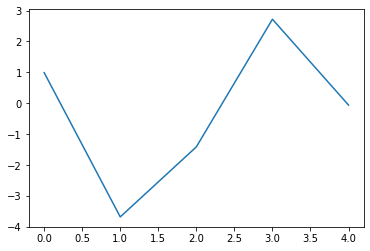

In [27]:
plt.plot(model.means_)

## 1. Log-likelihood test